In [1]:
from lsst.ts.wep.task.DonutStamp import DonutStamp
import numpy as np
import matplotlib.pyplot as plt

from lsst.ts.wep.cwfs.Tool import ZernikeAnnularEval, ZernikeMaskedFit

In [2]:
%matplotlib inline

In [112]:
# setup coordinate grid
x1d = np.linspace(-1, 1, 256) # normalized x coord
x, y = np.meshgrid(x1d, x1d) # grid of coords

# create annulus
e = 0.61 # obscuration ratio of annulus
r = np.sqrt(x**2 + y**2) # radii
background_idx = (r > 1) | (r < e)

# create wavefront for valid pixels
np.random.seed(1000)
zc = np.random.normal(size=23)
wf = ZernikeAnnularEval(zc, x, y, e)
wf[background_idx] = np.nan
wf += np.random.normal(scale=1., size=wf.shape)

idx = ((0 < np.arctan(y / x)) & (np.arctan(y / x) < np.pi/2.5) & (y > 0))
wf[idx] = np.nan

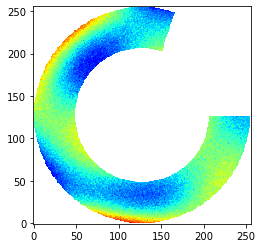

In [113]:
plt.imshow(wf, cmap="jet", origin="lower")

In [114]:
zc_fit = ZernikeMaskedFit(wf, x, y, 23, np.ones_like(wf), e)

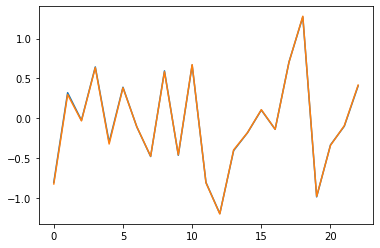

In [115]:
plt.plot(zc)
plt.plot(zc_fit)